# Best X finder - Test for one period

Veremos cómo funciona el algoritmo en un script distinto puesto que podría haber variables inicializadas en los test del script *two_best_X_finder.ipynb*

In [1]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib import ticker
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
from termcolor import colored
import seaborn as sns
import plotly
import warnings
import os
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
print('Modulos importados')

Modulos importados


In [2]:
# Configuraciones
warnings.filterwarnings('ignore')
# Reduzcamos el número de línea a leer
pd.options.display.max_rows = 15

In [3]:
# Veamos el directorio actual de trabajo
print(os.getcwd())
# El directorio anterior es el correcto, pero si no lo fuese, hacemos lo sigueinte:
path = '/home/usuario/Documentos/Github/Proyectos/MLB_HN'
os.chdir(path)

/home/usuario/Documentos/Github/Proyectos/MLB_HN/Models/Linear_models/Free_agent/Best_X_finder


In [4]:
print("Para modificar el tamaño de todos los gráficos")
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,9

Para modificar el tamaño de todos los gráficos


In [5]:
# Veamos el directorio actual de trabajo
print(os.getcwd())
# El directorio anterior es el correcto, pero si no lo fuese, hacemos lo sigueinte:
path = '/home/usuario/Documentos/Github/Proyectos/MLB_HN'
print("Nuevo directorio de trabajo: " + str(os.chdir(path)))

/home/usuario/Documentos/Github/Proyectos/MLB_HN
Nuevo directorio de trabajo: None


## Exploración de datos

Estudiaremos de manera general si hay datos faltantes, así como el tipo de datos que contiene

In [6]:
# Años de análisis
starting_year = 2012
period = 11
csv = '.csv'
# Directorios
hitters_path = 'ETL_Data/Agent/First_Two_Years_Contract/Period_t_1/Free_Agent/Hitters/free_agents_batters_'
pitchers_path = 'ETL_Data/Agent/First_Two_Years_Contract/Period_t_1/Free_Agent/Pitchers/free_agents_pitchers_'
# Originales:
df_pitchers = [None]*period
df_pitchers_copy = [None]*period
df_hitters = [None]*period
df_hitters_copy = [None]*period

Leamos todos las bases de datos correspondientes

In [7]:
for year in range(0,period):
    df_pitchers[year] = pd.read_csv(pitchers_path + str(starting_year + year) + csv)
    df_pitchers_copy[year] = df_pitchers[year].copy()
    
    df_hitters[year] = pd.read_csv(hitters_path + str(starting_year + year) + csv)
    df_hitters_copy[year] = df_hitters[year].copy()

Observemos el contenido de las bases de datos

In [8]:
# Pitchers
df_pitchers_copy[5].head()

,Acronimo_t,Acronimo_t_1,Altura_t,Altura_t_1,Anio_de_agente_libre_t,Anio_de_agente_libre_t_1,Anio_t,Anios_de_contrato,Anios_de_contrato_t,Anios_de_contrato_t_1,...,Walks_2_t_1,Walks_t,Walks_t_1,Wins_2_t,Wins_2_t_1,Wins_t,Wins_t_1,ln_Sueldo_ajustado_t,ln_Sueldo_base_t,ln_Sueldo_regular_t
0,NYY,CHC,6.400000,6.40000,2022,2017,2017,5,5,1,...,324,20,18,16,16,4,4,16.660420,16.523561,16.660420
1,LAD,LAD,6.500000,6.50000,2022,2017,2017,5,5,1,...,121,7,11,25,9,5,3,16.243259,16.118096,16.243259
2,SF,WSH,6.100000,6.10000,2021,2017,2017,4,4,1,...,144,6,12,1,4,1,2,16.454568,15.201805,16.454568
3,LAD,LAD,6.500000,6.50000,2020,2017,2017,3,3,1,...,1089,49,33,144,144,12,12,16.354484,16.300417,16.354484
4,STL,TOR,5.718369,5.72134,2021,2017,2017,4,4,1,...,64,16,8,4,1,2,1,15.863203,15.830414,15.863203


In [9]:
list(enumerate(df_pitchers_copy[5].columns))

[(0, 'Acronimo_t'),
 (1, 'Acronimo_t_1'),
 (2, 'Altura_t'),
 (3, 'Altura_t_1'),
 (4, 'Anio_de_agente_libre_t'),
 (5, 'Anio_de_agente_libre_t_1'),
 (6, 'Anio_t'),
 (7, 'Anios_de_contrato'),
 (8, 'Anios_de_contrato_t'),
 (9, 'Anios_de_contrato_t_1'),
 (10, 'Antiguedad_t'),
 (11, 'Antiguedad_t_1'),
 (12, 'Bateos_en_contra_2_t'),
 (13, 'Bateos_en_contra_2_t_1'),
 (14, 'Bateos_en_contra_t'),
 (15, 'Bateos_en_contra_t_1'),
 (16, 'Bono_por_firma_t'),
 (17, 'Bono_por_firma_t_1'),
 (18, 'Cantidad_agentes_libres_t'),
 (19, 'Cantidad_agentes_libres_t_1'),
 (20, 'Cantidad_de_equipos_t'),
 (21, 'Cantidad_de_equipos_t_1'),
 (22, 'Carreras_en_contra_2_t'),
 (23, 'Carreras_en_contra_2_t_1'),
 (24, 'Carreras_en_contra_t'),
 (25, 'Carreras_en_contra_t_1'),
 (26, 'Carreras_ganadas_2_t'),
 (27, 'Carreras_ganadas_2_t_1'),
 (28, 'Carreras_ganadas_t'),
 (29, 'Carreras_ganadas_t_1'),
 (30, 'Comando_2_t'),
 (31, 'Comando_2_t_1'),
 (32, 'Comando_t'),
 (33, 'Comando_t_1'),
 (34, 'Control_2_t'),
 (35, 'Control_2_

In [10]:
# Hitters
df_hitters_copy[5].head()

,Acronimo_t,Acronimo_t_1,Altura_t,Altura_t_1,Anio_de_agente_libre_t,Anio_de_agente_libre_t_1,Anio_t,Anios_de_contrato,Anios_de_contrato_t,Anios_de_contrato_t_1,...,Victorias_t_1,WAR_2_t,WAR_2_t_1,WAR_t,WAR_t_1,WS_ganadas_t,WS_ganadas_t_1,ln_Sueldo_ajustado_t,ln_Sueldo_base_t,ln_Sueldo_regular_t
0,NYM,NYM,5.718369,5.72134,2021,2017,2017,4,4,3,...,87,3.841600,8.7025,1.960000,2.95,2,2,16.929026,16.929026,16.929026
1,STL,CHC,6.500000,6.50000,2022,2017,2017,5,5,1,...,102,3.097600,15.9201,1.760000,3.99,11,3,16.618871,16.489659,16.618871
2,COL,TEX,6.300000,6.30000,2023,2017,2017,5,5,1,...,95,3.009561,4.8841,1.734809,2.21,0,0,15.894952,15.894952,15.894952
3,HOU,LAD,6.200000,6.20000,2021,2017,2017,4,4,1,...,91,20.250000,0.0016,4.500000,0.04,1,6,16.380460,16.380460,16.380460
4,LAD,LAD,6.500000,6.50000,2020,2017,2017,3,3,1,...,91,4.884100,1.9321,2.210000,1.39,6,6,16.354484,16.300417,16.354484


Veamos las columnas con sus índices

In [11]:
list(enumerate(df_hitters_copy[5].columns))

[(0, 'Acronimo_t'),
 (1, 'Acronimo_t_1'),
 (2, 'Altura_t'),
 (3, 'Altura_t_1'),
 (4, 'Anio_de_agente_libre_t'),
 (5, 'Anio_de_agente_libre_t_1'),
 (6, 'Anio_t'),
 (7, 'Anios_de_contrato'),
 (8, 'Anios_de_contrato_t'),
 (9, 'Anios_de_contrato_t_1'),
 (10, 'Antiguedad_t'),
 (11, 'Antiguedad_t_1'),
 (12, 'At_bats_2_t'),
 (13, 'At_bats_2_t_1'),
 (14, 'At_bats_t'),
 (15, 'At_bats_t_1'),
 (16, 'Bateos_2_t'),
 (17, 'Bateos_2_t_1'),
 (18, 'Bateos_promedio_2_t'),
 (19, 'Bateos_promedio_2_t_1'),
 (20, 'Bateos_promedio_t'),
 (21, 'Bateos_promedio_t_1'),
 (22, 'Bateos_t'),
 (23, 'Bateos_t_1'),
 (24, 'Bono_por_firma_t'),
 (25, 'Bono_por_firma_t_1'),
 (26, 'Cantidad_agentes_libres_t'),
 (27, 'Cantidad_agentes_libres_t_1'),
 (28, 'Cantidad_de_equipos_t'),
 (29, 'Cantidad_de_equipos_t_1'),
 (30, 'Dobles_2_t'),
 (31, 'Dobles_2_t_1'),
 (32, 'Dobles_t'),
 (33, 'Dobles_t_1'),
 (34, 'Edad_al_firmar_t'),
 (35, 'Edad_al_firmar_t_1'),
 (36, 'Edad_t'),
 (37, 'Equipo_anterior'),
 (38, 'Equipo_t'),
 (39, 'Equipo

Veamos si hay bases de datos con variables que distintas entre sí

## Test

In [12]:
def etl_regression(X_raw, Y_raw, df_copy):
    # Creación de la base de datos a transformar las variables de la regresión
    jugador = 'Jugador'
    YX_raw = [None]*period
    
    for year in range(0, period):
        YX_raw[year] = df_copy[year][[jugador, Y_raw, X_raw]]

    # Ajuste de inflación en los salarios    
    # Ajuste de inflación en los salarios    
    cpi = {2012:1.31, 2013:1.29,
           2014:1.27, 2015:1.27,
           2016:1.26, 2017:1.23,
           2018:1.20, 2019:1.18,
           2020:1.15, 2021:1.14,
           2022:1}
    
    for year in range(0, period):
        YX_raw[year][[Y_raw]] = YX_raw[year][[Y_raw]]*cpi[starting_year + year]
        YX_raw[year].rename(columns = {Y_raw: Y_raw + '_' + str(2012 + year)}, inplace = True)
        YX_raw[year].rename(columns = {X_raw: X_raw + '_' + str(2012 + year)}, inplace = True)

    # Filtrado de base de datos
    YX_panel_raw = pd.merge(YX_raw[0], YX_raw[1], how = 'outer', on = 'Jugador')

    for year in range(2,period):
        YX_panel_raw = pd.merge(YX_panel_raw, YX_raw[year], how = 'outer', on = 'Jugador')

    YX_panel_raw.drop_duplicates(subset = 'Jugador', inplace = True)
    YX_panel_raw = YX_panel_raw.sort_values(by = 'Jugador', ascending = True)
    YX_panel_raw.reset_index(drop = True, inplace = True)
    YX_panel_raw.sort_index(axis = 1, inplace = True)

    # Recolocación al principio de Jugador
    player_column = YX_panel_raw.pop('Jugador')
    YX_panel_raw.insert(0, 'Jugador', player_column)

    # Creación de base de datos auxiliares  para remover los NaN
    split_column = 1 + period
    max_nan = 2

    if Y_raw > X_raw:
        X_drop_etl = YX_panel_raw.iloc[:, 1:split_column]
    else:
        X_drop_etl = YX_panel_raw.iloc[:, split_column:YX_panel_raw.shape[1]]

    nulls_quantity = period - max_nan
    X_drop_etl = X_drop_etl.iloc[X_drop_etl[(X_drop_etl.isnull().sum(axis = 1) > nulls_quantity)].index]
    X_index_drop = X_drop_etl.index

    if Y_raw > X_raw:
        Y_drop_etl = YX_panel_raw.iloc[:, split_column:YX_panel_raw.shape[1]]
    else:
        Y_drop_etl = YX_panel_raw.iloc[:, 1:split_column]
    Y_drop_etl = Y_drop_etl.iloc[Y_drop_etl[(Y_drop_etl.isnull().sum(axis = 1) > nulls_quantity)].index]
    Y_index_drop = Y_drop_etl.index

    # índice de los jugadores que no tienen más de dos observaciones en el periodo de analisis
    index_drop = list(set(X_index_drop).union(set(Y_index_drop)))

    YX_panel_raw.drop(index = index_drop, inplace = True)
    YX_panel_raw.reset_index(drop = True, inplace = True)
    YX_panel_raw = YX_panel_raw.sort_values(by = 'Jugador', ascending = True)

    # Borremos provicionalmente a los jugadores cuyo estadística máxima es igual a 0
    if Y_raw > X_raw:
        YX_panel_raw[X_raw + '_max'] = YX_panel_raw.iloc[:, 1:split_column].max(axis = 1)
    else:
        YX_panel_raw[X_raw + '_max'] = YX_panel_raw.iloc[:, split_column:YX_panel_raw.shape[1]].max(axis = 1)
    YX_max_0 = YX_panel_raw[YX_panel_raw[X_raw + '_max'] == 0]
    YX_max_0_index_drop = YX_max_0.index
    YX_panel_raw.drop(columns = X_raw + '_max', inplace = True)
    YX_panel_raw.drop(index = YX_max_0_index_drop, inplace = True)
    YX_panel_raw.reset_index(drop = True, inplace = True)

    # Variable X
    if Y_raw > X_raw:
        X_etl = YX_panel_raw.iloc[:, 1:split_column]
    else:
        X_etl = YX_panel_raw.iloc[:, split_column:YX_panel_raw.shape[1]]
    max_element = X_etl.max(axis = 1)
    min_element = X_etl.min(axis = 1)
    max_min = (max_element + min_element)/2
    dummy_names = []
    X_names = []
    for year in range(0,period):
        dummy_names.append("I_" + str(2012 + year))
        X_names.append("X_" + str(2012 + year))
    for year in range(0,period):
        X_conditions = [
        (X_etl.iloc[:,year] == max_element) & ~(X_etl.iloc[:,year].isnull()),
        (X_etl.iloc[:,year] != max_element) & ~(X_etl.iloc[:,year].isnull())
        ]
        X_conditions_values = [0,1]
        X_etl[dummy_names[year]] = np.select(X_conditions, X_conditions_values, default = np.nan)
    X_aux = X_etl.iloc[:,:period]
    Dummy = X_etl.iloc[:,period:]
    X_max = X_aux.max(axis = 1)
    X_aux[['Max']] = np.sqrt(X_max)
    for year in range(0,period):    
        X_etl['X_' + str(2012 + year)] = \
        (X_aux[X_raw + '_' + str(2012 + year)]*
        ((-1)**Dummy['I_' + str(2012 + year)]))
    X_etl = X_etl.div(X_aux['Max'].values, axis = 0)
    X_etl = X_etl.iloc[:,2*period:]
    for i in range(0,X_etl.shape[0]):
        row = X_etl.iloc[i]
        row_length = row.size
        sustitute = []

        for j in range(row_length):
            if pd.isna(row[j]) != True:
                sustitute.append(row[j])

        sustitute_length = len(sustitute)

        for k in range(row_length - sustitute_length):
            sustitute.append(np.nan)

        for j in range(row_length):
            X_etl.iloc[i,j] = sustitute[j]

    X_etl.columns = ['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 
                     'X_7', 'X_8', 'X_9', 'X_10', 'X_11']
    X_etl[['Jugador']] = YX_panel_raw[['Jugador']]
    X_player_column = X_etl.pop('Jugador')
    X_etl.insert(0, 'Jugador', X_player_column)

    # Variable Y
    if Y_raw > X_raw:
        Y_etl = YX_panel_raw.iloc[:, split_column:YX_panel_raw.shape[1]]
    else:
        Y_etl = YX_panel_raw.iloc[:, 1:split_column]
    for i in range(0,Y_etl.shape[0]):
        row = Y_etl.iloc[i]
        row_length = row.size
        sustitute = []

        for j in range(row_length):
            if pd.isna(row[j]) != True:
                sustitute.append(row[j])

        sustitute_length = len(sustitute)

        for k in range(row_length - sustitute_length):
            sustitute.append(np.nan)

        for j in range(row_length):
            Y_etl.iloc[i,j] = sustitute[j]

    Y_etl.columns = ['w_1', 'w_2', 'w_3', 'w_4', 'w_5', 'w_6', 
                     'w_7', 'w_8', 'w_9', 'w_10', 'w_11']
    Y_etl[['Jugador']] = YX_panel_raw[['Jugador']]
    Y_player_column = Y_etl.pop('Jugador')
    Y_etl.insert(0, 'Jugador', Y_player_column)
    Y_etl_copy = Y_etl.copy()
    y_etl_names = Y_etl_copy['Jugador']
    for i in range(0,len(y_etl_names)):
        row = Y_etl_copy.iloc[i]
        row_length = row.size
        k = 0

        sustitute = []

        for j in range(0, row_length):
            if pd.isna(row[j]) != True:
                k = k + 1

        sustitute.append(y_etl_names[i])
        for j in range(1,k - 1):
            sustitute.append(row[j + 1]**0.5 - row[j]**0.5)

        sustitute_length = len(sustitute)

        for k in range(row_length - sustitute_length):
            sustitute.append(np.nan)

        for j in range(row_length):
            Y_etl_copy.iloc[i,j] = sustitute[j]

    Y_etl_copy.columns = ['Jugador', 'Y_1', 'Y_2', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 
                          'Y_7', 'Y_8', 'Y_9', 'Y_10', 'Y_11']
    Y_etl = Y_etl_copy

    # Base de datos
    regression_list = [None]*(period-1)
    for i in range(0,len(regression_list)):
        merge = pd.merge(Y_etl.iloc[:,[0,i+1]], X_etl.iloc[:,[0,i+1]])
        regression_list[i] = merge
        regression_list[i].columns = ['Jugador', 'Y', 'X']
    df_article_regression = regression_list[0]
    for i in range(1,len(regression_list)):
        df_article_regression = pd.concat([df_article_regression, regression_list[i]])
    df_article_regression = df_article_regression.sort_values(by = 'Jugador', ascending = True)
    df_article_regression.reset_index(drop = True, inplace = True)
    df_article_regression.dropna(inplace = True)
    df_article_regression.reset_index(drop = True, inplace = True)
    
    # Construimos la regresion
    Y = df_article_regression['Y'].tolist()
    X = df_article_regression['X'].tolist()
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    
    # Regresamos como argumento al modelo
    return [df_article_regression, model]

In [13]:
X_raw_pitcher_t = 'Inning_pitched_t_1'
Y_raw_t = 'Sueldo_ajustado_t'
df_copy_t = df_pitchers_copy

In [14]:
df_regression_t, model_t = etl_regression(X_raw_pitcher_t, Y_raw_t, df_copy_t)

Veamos la base de datos ocupada para la regresión y después los datos sobre la regresión

In [15]:
df_regression_t

,Jugador,Y,X
0,A.J. Burnett,-494.306419,-13.065653
1,Aaron Harang,-143.723487,-12.572276
2,Adam Ottavino,-1124.025620,8.814760
3,Adam Ottavino,-633.871074,-2.076063
4,Adam Ottavino,735.130524,-7.521475
...,...,...,...
376,Zack Greinke,-2781.936494,-13.556132
377,Zack Greinke,-78.388783,14.923136
378,Zack Greinke,910.513434,-13.556132
379,Zack Greinke,-111.589325,-11.907685


In [16]:
model_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.490
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.115
Time:                        10:47:38   Log-Likelihood:                -3221.7
No. Observations:                 381   AIC:                             6447.
Df Residuals:                     379   BIC:                             6455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0130     58.988      0.848      0.397     -65.972     165.998
x1            10.2107      6.470      1.578      0.115      -2.511      22.933
==============================================================================
Omnibus:                       17.811   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.854
Skew:                          -0.425   Prob(JB):                     1.80e-05
Kurtosis:                       3.808   Cond. No.                         9.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que el algoritmo funciona adecuadamente

## Pitchers

Hagamos una prueba con una serie de estadísticas deportivas para cada grupo

In [17]:
pitcher_statistics_t = ['Bateos_en_contra_t_1', 'Carreras_en_contra_t_1', 'Carreras_ganadas_t_1', 'Comando_t_1', 'Control_t_1',
                        'Dominio_t_1', 'ERA_t_1', 'Inning_pitched_t_1', 'Juegos_t_1', 'Juegos_iniciados_t_1', 
                        'Losses_t_1', 'Saves_t_1', 'TVS_t_1', 'WAR_t_1', 'WHIP_t_1', 'Walks_t_1', 'Wins_t_1', 
                        'Bateos_en_contra_2_t_1', 'Carreras_en_contra_2_t_1', 'Carreras_ganadas_2_t_1', 'Comando_2_t_1', 'Control_2_t_1',
                        'Dominio_2_t_1', 'ERA_2_t_1', 'Inning_pitched_2_t_1', #'Juegos_iniciados_2_t_1', 
                        'Losses_2_t_1', 'Saves_2_t_1', 'TVS_2_t_1', 'WAR_2_t_1', 'WHIP_2_t_1', 'Walks_2_t_1', 'Wins_2_t_1']
Y_pitcher_raw_t = 'Sueldo_ajustado_t'
pitcher_Statistics_len = len(pitcher_statistics_t)
pitcher_model_t = [None]*pitcher_Statistics_len
df_pitcher_model_t = [None]*pitcher_Statistics_len

Bateos_en_contra_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1569
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.692
Time:                        10:47:39   Log-Likelihood:                -3222.9
No. Observations:                 381   AIC:                             6450.
Df Residuals:                     379   BIC:                             6458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.2833     59.41

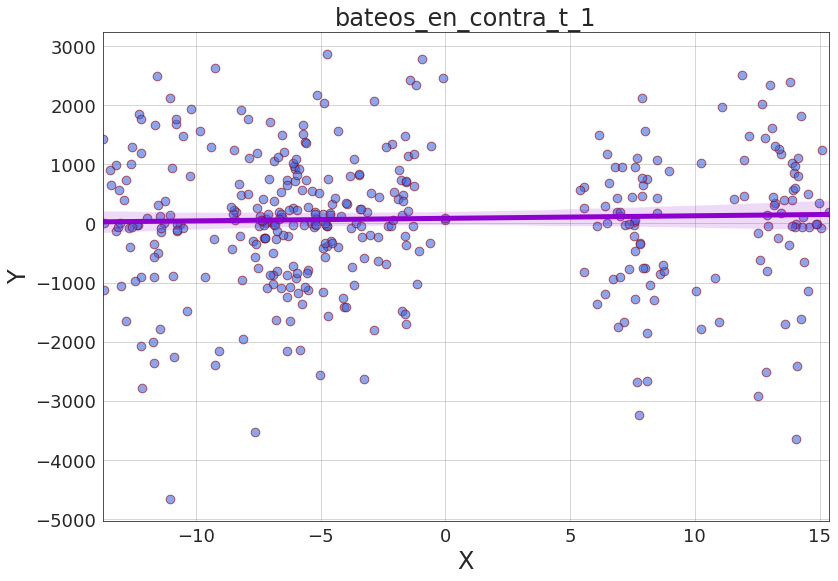

Carreras_en_contra_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.498
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.115
Time:                        10:47:45   Log-Likelihood:                -3221.7
No. Observations:                 381   AIC:                             6447.
Df Residuals:                     379   BIC:                             6455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.4132     59.

<Figure size 1080x648 with 0 Axes>

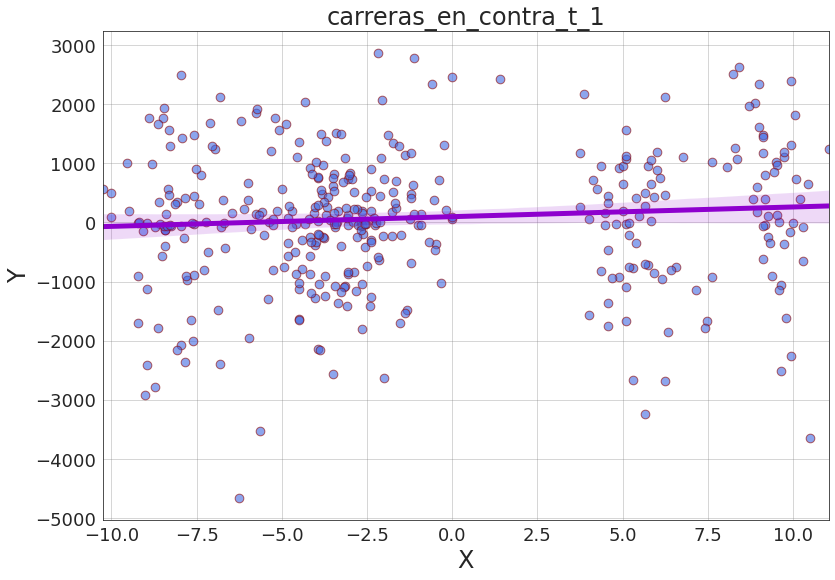

Carreras_ganadas_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.428
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0649
Time:                        10:47:51   Log-Likelihood:                -3221.2
No. Observations:                 381   AIC:                             6446.
Df Residuals:                     379   BIC:                             6454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.5756     59.38

<Figure size 1080x648 with 0 Axes>

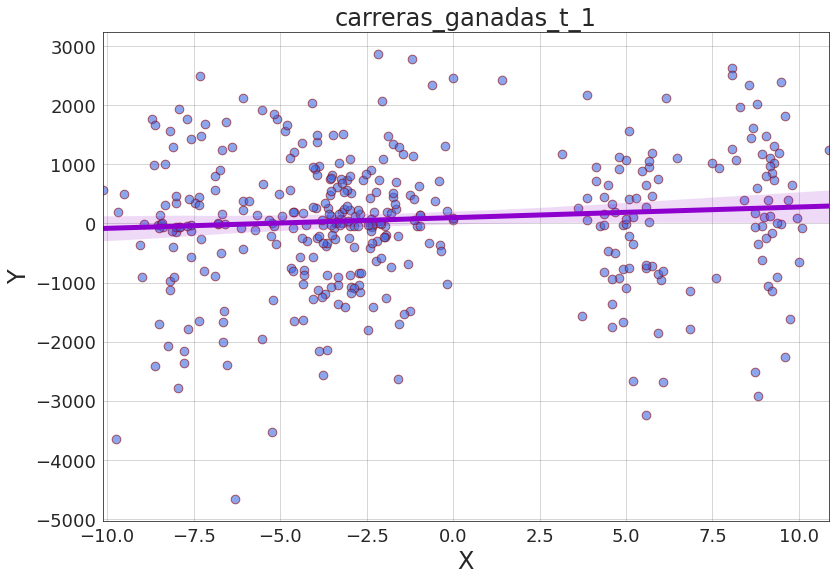

Comando_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.757
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0977
Time:                        10:47:57   Log-Likelihood:                -3221.6
No. Observations:                 381   AIC:                             6447.
Df Residuals:                     379   BIC:                             6455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.8305     58.762      0.

<Figure size 1080x648 with 0 Axes>

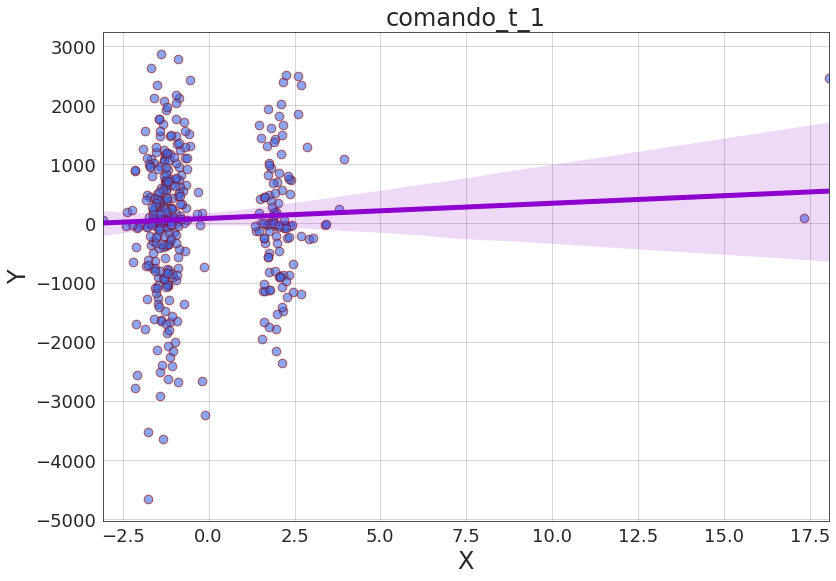

Control_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.491
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0196
Time:                        10:48:02   Log-Likelihood:                -3220.2
No. Observations:                 381   AIC:                             6444.
Df Residuals:                     379   BIC:                             6452.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.6811     59.541      1.

<Figure size 1080x648 with 0 Axes>

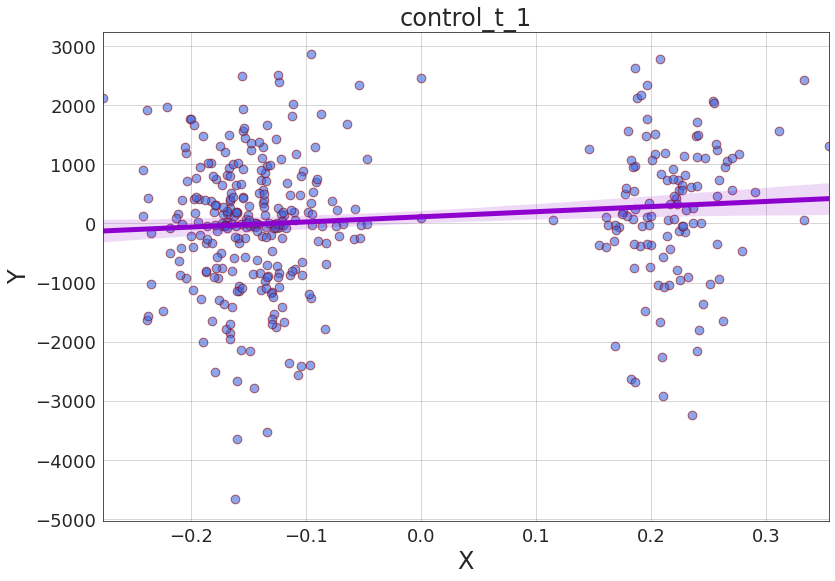

Dominio_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1832
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.669
Time:                        10:48:09   Log-Likelihood:                -3222.9
No. Observations:                 381   AIC:                             6450.
Df Residuals:                     379   BIC:                             6458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2894     62.136      0.

<Figure size 1080x648 with 0 Axes>

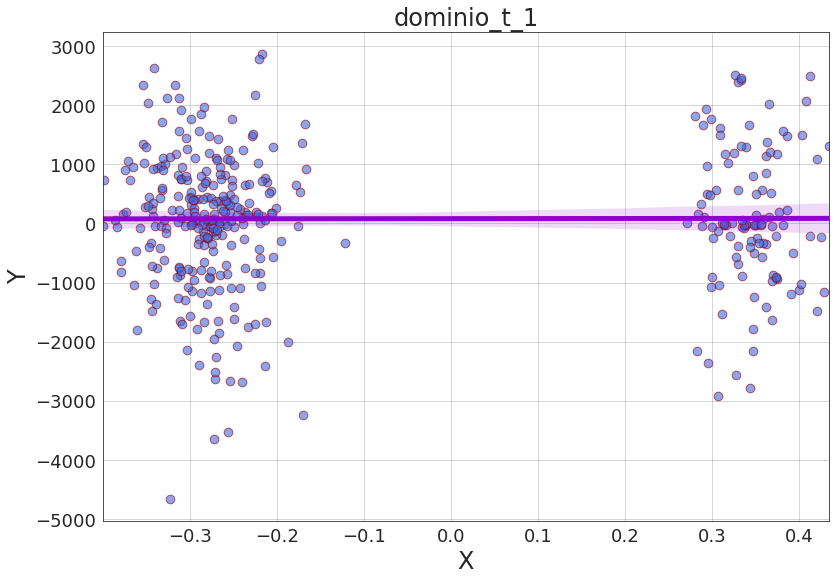

ERA_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     6.597
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0106
Time:                        10:48:15   Log-Likelihood:                -3219.7
No. Observations:                 381   AIC:                             6443.
Df Residuals:                     379   BIC:                             6451.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.8153     59.105      1.097 

<Figure size 1080x648 with 0 Axes>

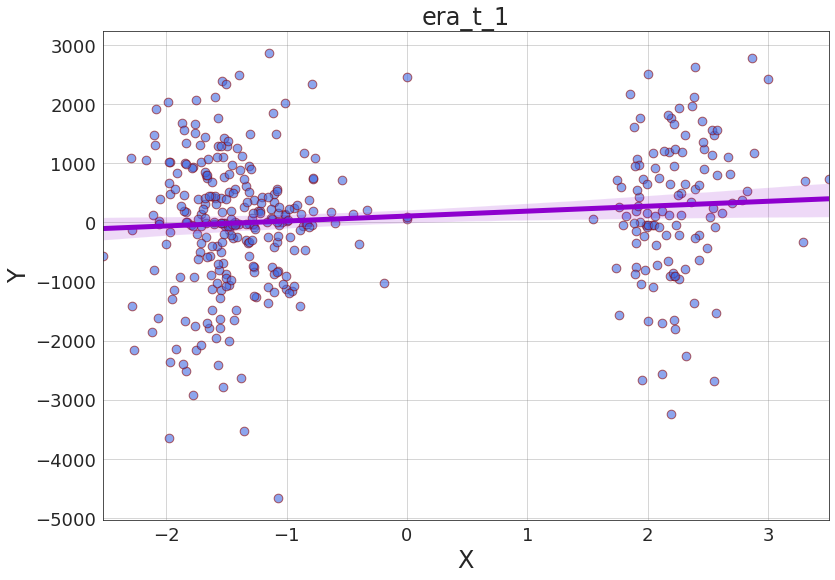

Inning_pitched_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.490
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.115
Time:                        10:48:21   Log-Likelihood:                -3221.7
No. Observations:                 381   AIC:                             6447.
Df Residuals:                     379   BIC:                             6455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0130     58.988 

<Figure size 1080x648 with 0 Axes>

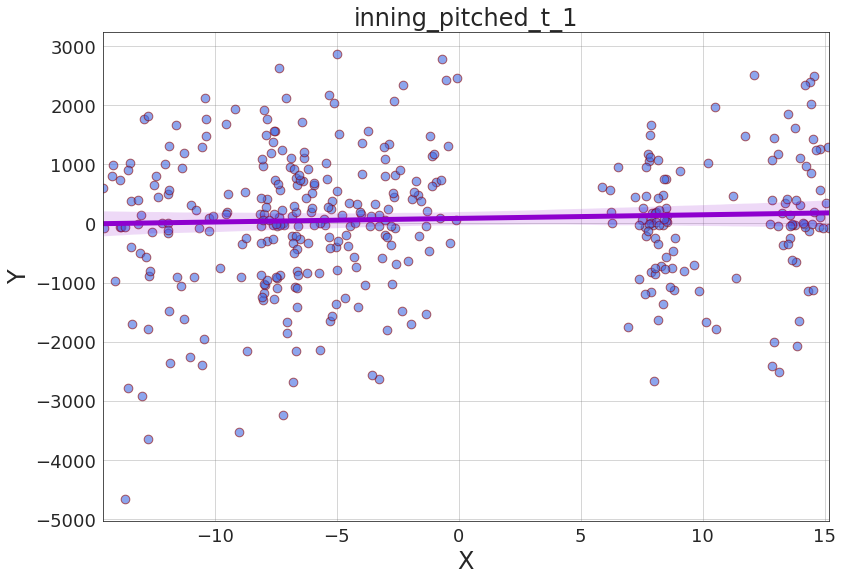

Juegos_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.01504
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.902
Time:                        10:48:27   Log-Likelihood:                -3222.9
No. Observations:                 381   AIC:                             6450.
Df Residuals:                     379   BIC:                             6458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.5179     59.247      0.6

<Figure size 1080x648 with 0 Axes>

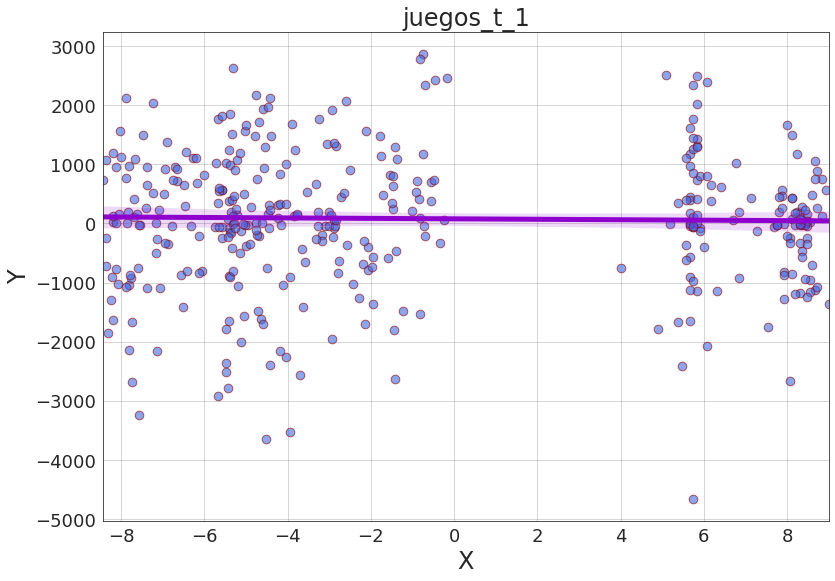

Juegos_iniciados_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1838
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.669
Time:                        10:48:32   Log-Likelihood:                -1923.1
No. Observations:                 225   AIC:                             3850.
Df Residuals:                     223   BIC:                             3857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.7555     83.50

<Figure size 1080x648 with 0 Axes>

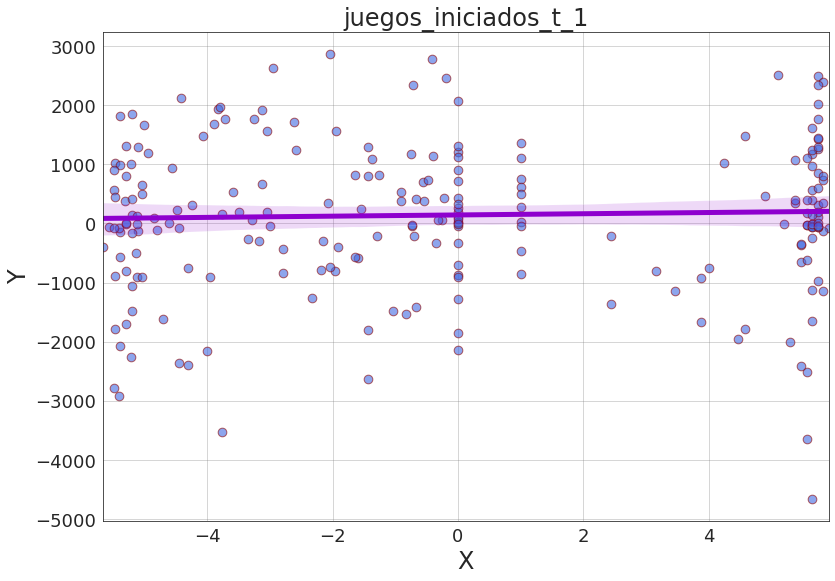

Losses_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4799
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.489
Time:                        10:48:37   Log-Likelihood:                -3222.7
No. Observations:                 381   AIC:                             6449.
Df Residuals:                     379   BIC:                             6457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4537     58.623      0.6

<Figure size 1080x648 with 0 Axes>

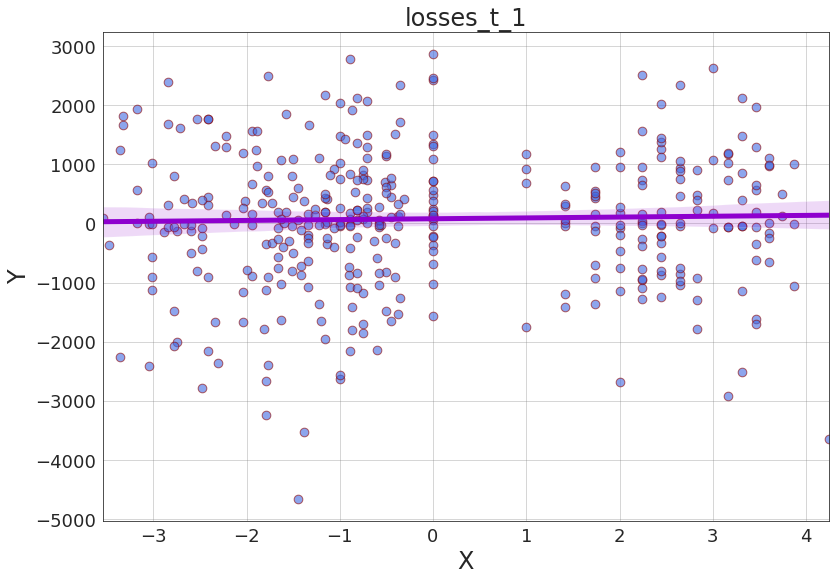

Saves_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8328
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.363
Time:                        10:48:43   Log-Likelihood:                -1766.0
No. Observations:                 211   AIC:                             3536.
Df Residuals:                     209   BIC:                             3543.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.8599     73.413     -0.74

<Figure size 1080x648 with 0 Axes>

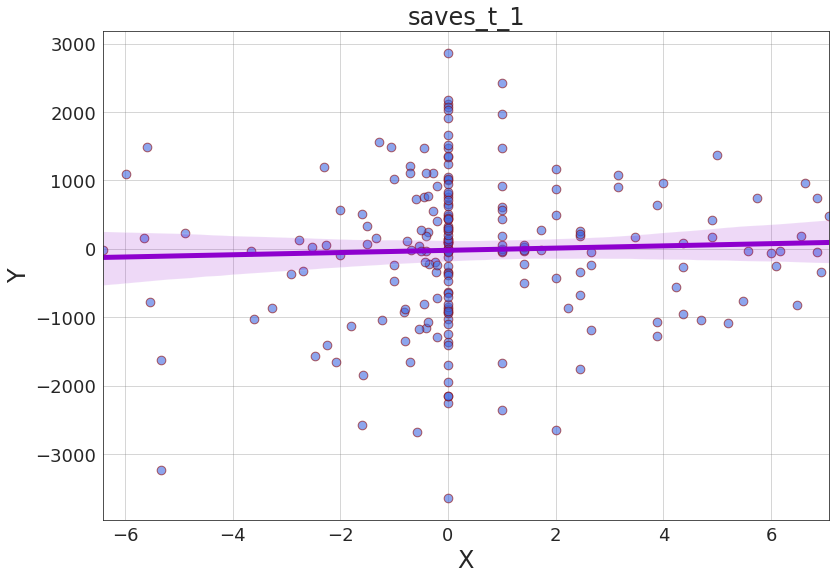

TVS_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1449
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.704
Time:                        10:48:49   Log-Likelihood:                -3044.6
No. Observations:                 360   AIC:                             6093.
Df Residuals:                     358   BIC:                             6101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7740     60.740      0.605 

<Figure size 1080x648 with 0 Axes>

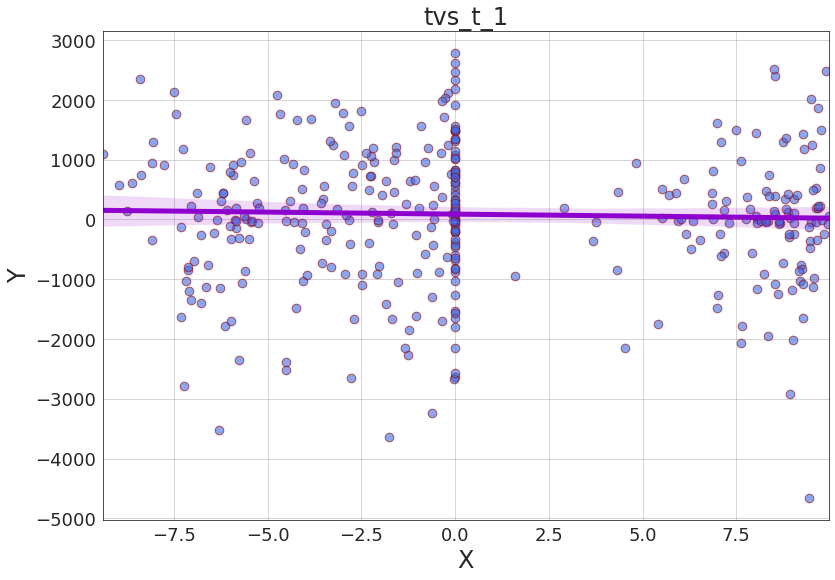

WAR_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1507
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.698
Time:                        10:48:55   Log-Likelihood:                -3222.9
No. Observations:                 381   AIC:                             6450.
Df Residuals:                     379   BIC:                             6458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8301     58.638      0.645 

<Figure size 1080x648 with 0 Axes>

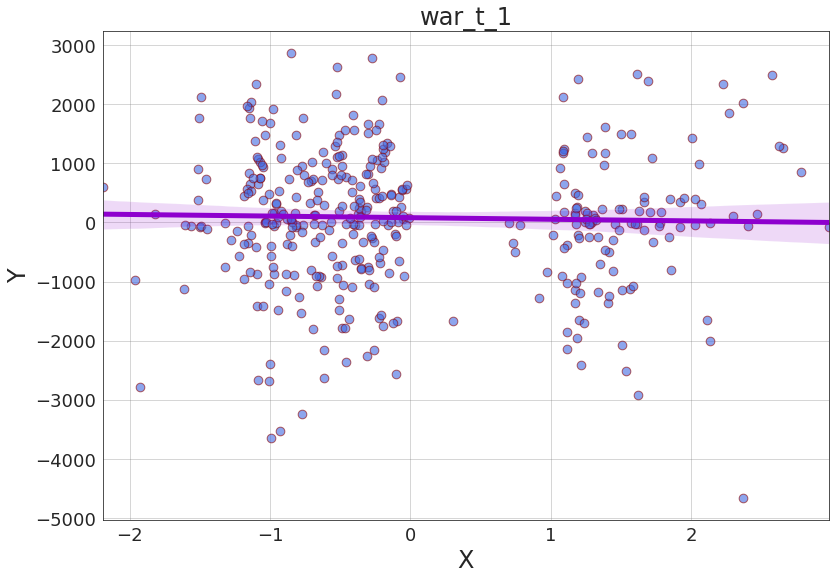

WHIP_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.494
Date:                Fri, 20 Jan 2023   Prob (F-statistic):            0.00221
Time:                        10:49:01   Log-Likelihood:                -3218.2
No. Observations:                 381   AIC:                             6440.
Df Residuals:                     379   BIC:                             6448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.3085     59.801      1.393

<Figure size 1080x648 with 0 Axes>

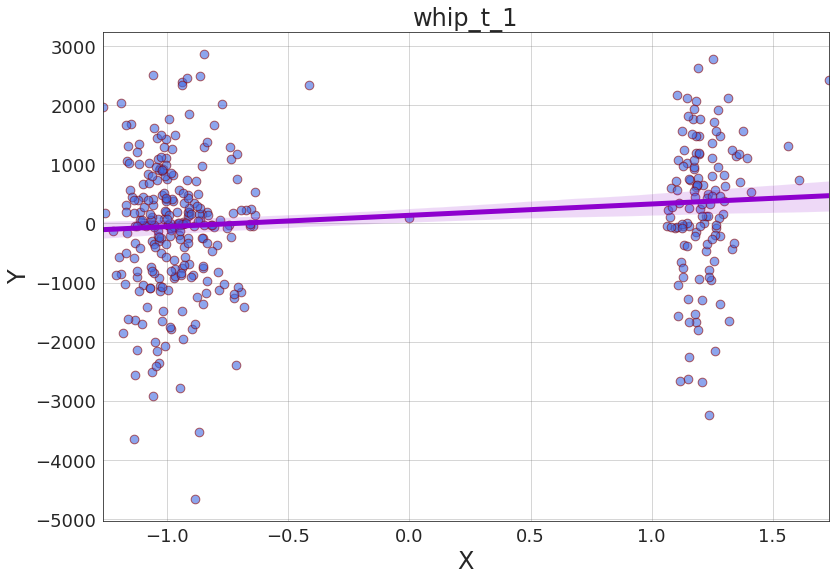

Walks_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.721
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0545
Time:                        10:49:08   Log-Likelihood:                -3221.1
No. Observations:                 381   AIC:                             6446.
Df Residuals:                     379   BIC:                             6454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6697     58.698      0.84

<Figure size 1080x648 with 0 Axes>

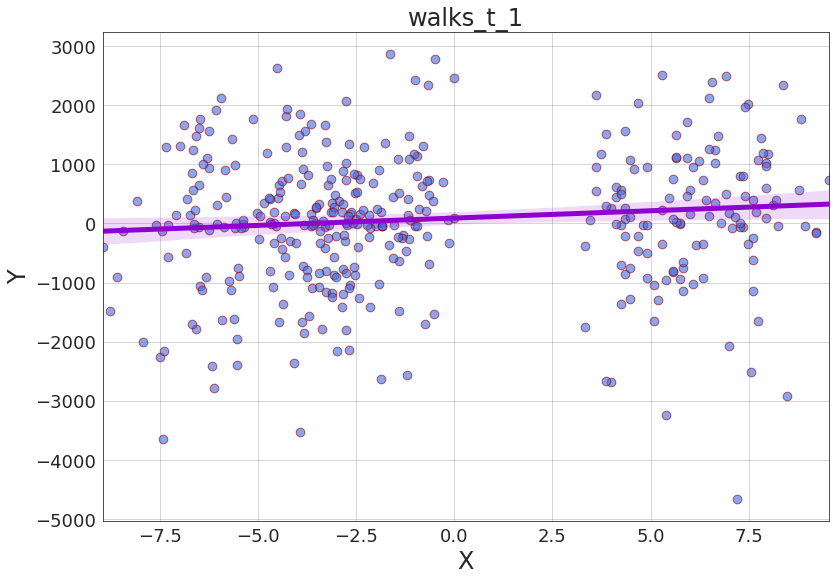

Wins_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.475
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.117
Time:                        10:49:14   Log-Likelihood:                -3204.2
No. Observations:                 379   AIC:                             6412.
Df Residuals:                     377   BIC:                             6420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6515     58.979      0.350

<Figure size 1080x648 with 0 Axes>

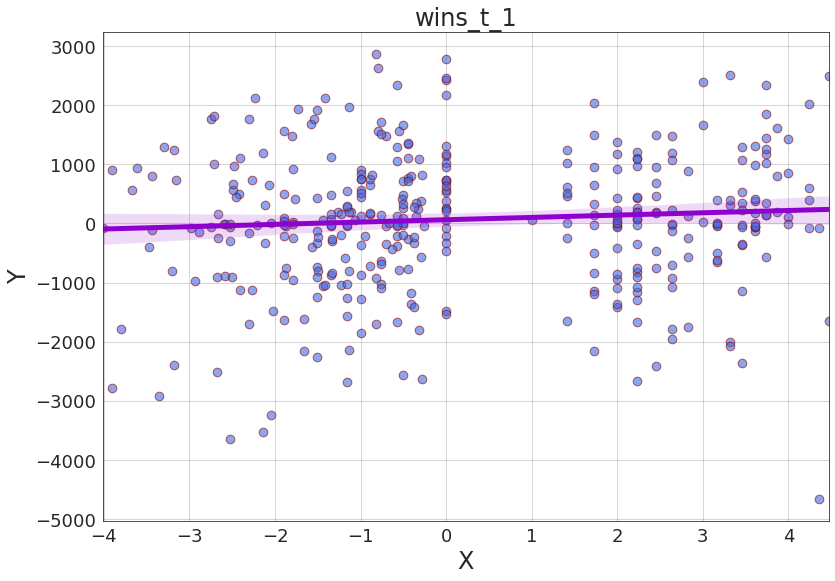

Bateos_en_contra_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3734
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.542
Time:                        10:49:20   Log-Likelihood:                -3222.8
No. Observations:                 381   AIC:                             6450.
Df Residuals:                     379   BIC:                             6457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.5416     58.

<Figure size 1080x648 with 0 Axes>

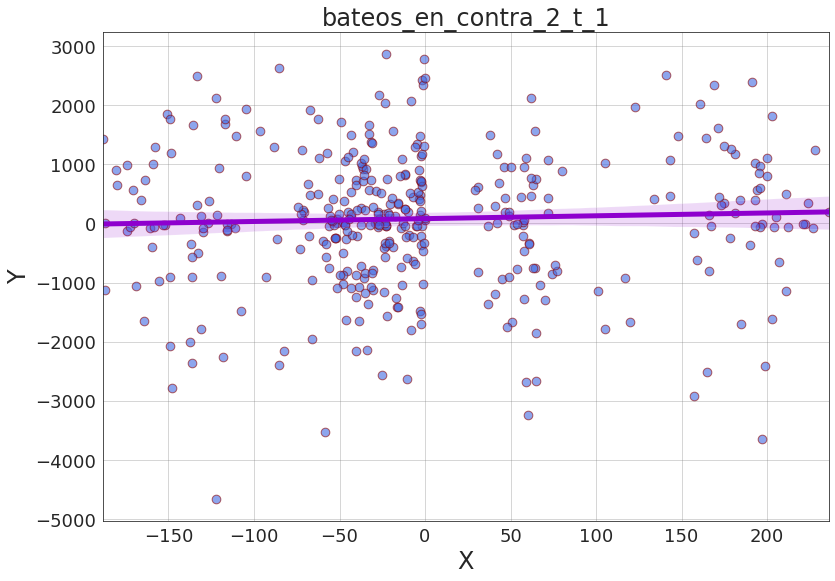

Carreras_en_contra_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.644
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.105
Time:                        10:49:26   Log-Likelihood:                -3221.6
No. Observations:                 381   AIC:                             6447.
Df Residuals:                     379   BIC:                             6455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8405     5

<Figure size 1080x648 with 0 Axes>

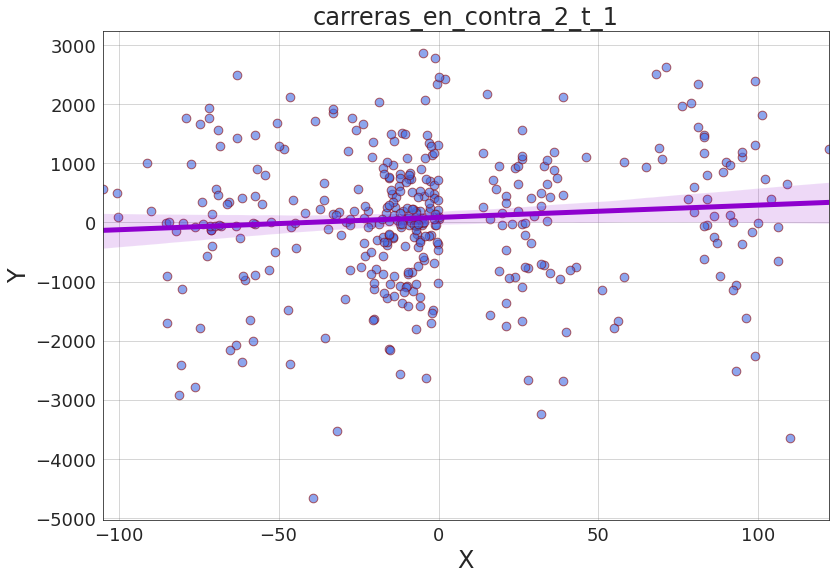

Carreras_ganadas_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.347
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0377
Time:                        10:49:32   Log-Likelihood:                -3220.8
No. Observations:                 381   AIC:                             6446.
Df Residuals:                     379   BIC:                             6453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3440     58.

<Figure size 1080x648 with 0 Axes>

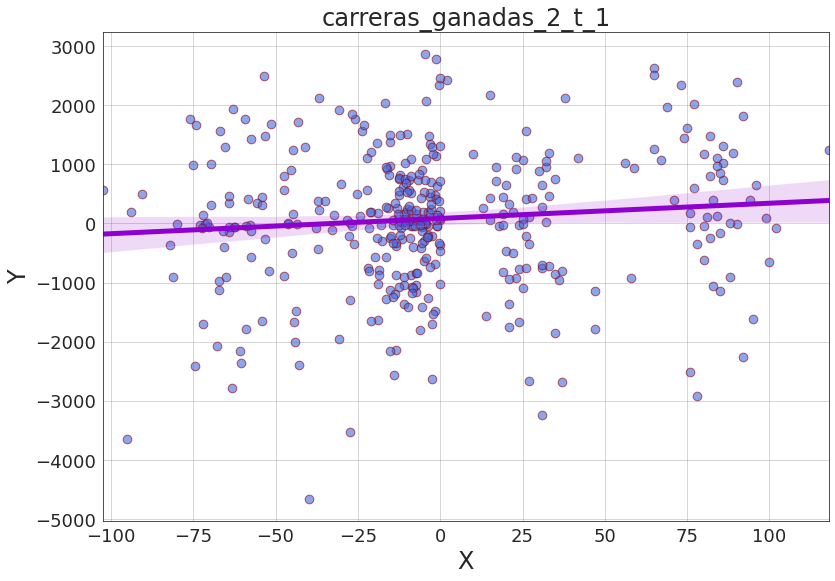

Comando_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.090
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0796
Time:                        10:49:39   Log-Likelihood:                -3221.4
No. Observations:                 381   AIC:                             6447.
Df Residuals:                     379   BIC:                             6455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.1339     58.555      

<Figure size 1080x648 with 0 Axes>

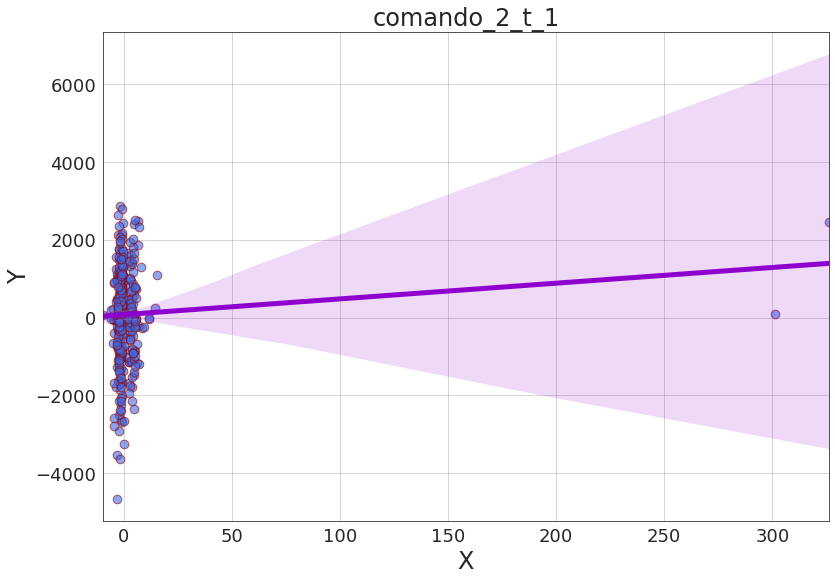

Control_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.747
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0170
Time:                        10:49:45   Log-Likelihood:                -3220.1
No. Observations:                 381   AIC:                             6444.
Df Residuals:                     379   BIC:                             6452.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2252     58.271      

<Figure size 1080x648 with 0 Axes>

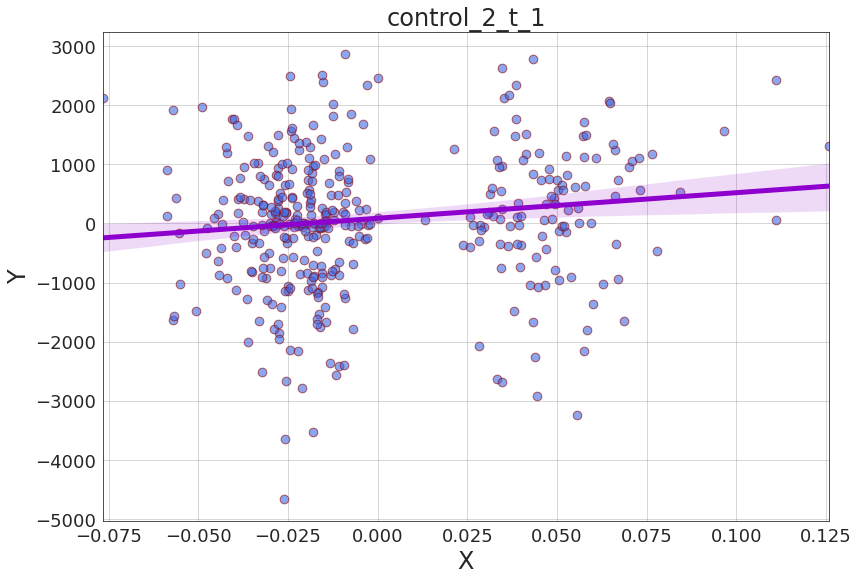

Dominio_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.08512
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.771
Time:                        10:49:52   Log-Likelihood:                -3222.9
No. Observations:                 381   AIC:                             6450.
Df Residuals:                     379   BIC:                             6458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6837     60.379      

<Figure size 1080x648 with 0 Axes>

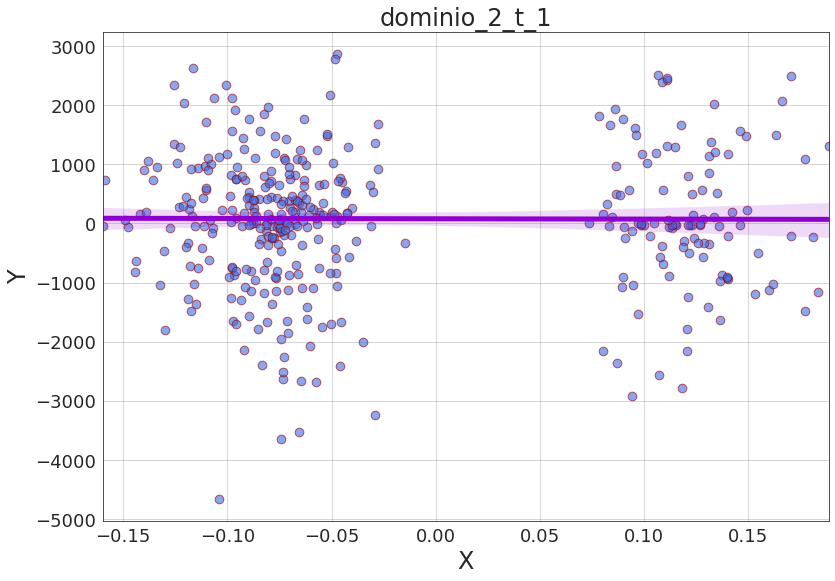

ERA_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     7.861
Date:                Fri, 20 Jan 2023   Prob (F-statistic):            0.00531
Time:                        10:49:58   Log-Likelihood:                -3219.0
No. Observations:                 381   AIC:                             6442.
Df Residuals:                     379   BIC:                             6450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2934     58.044      0.64

<Figure size 1080x648 with 0 Axes>

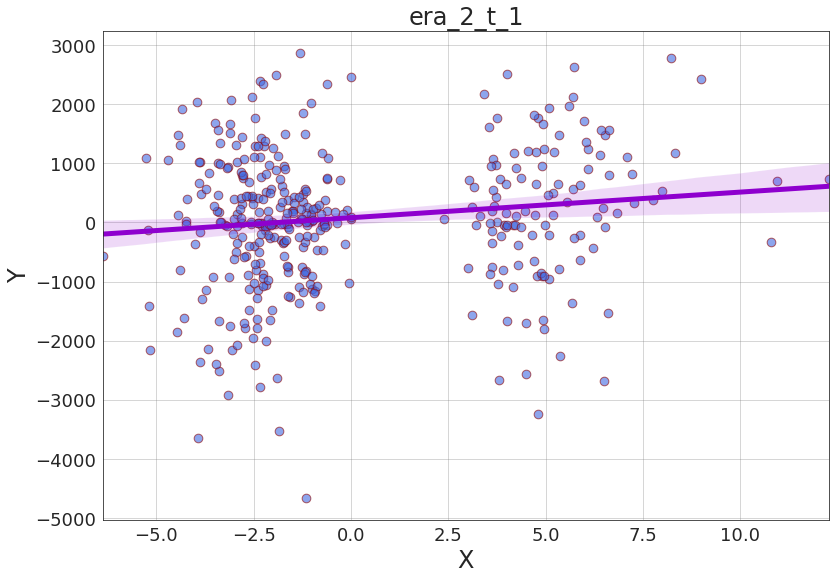

Inning_pitched_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.885
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0494
Time:                        10:50:03   Log-Likelihood:                -3221.0
No. Observations:                 381   AIC:                             6446.
Df Residuals:                     379   BIC:                             6454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7095     58.35

<Figure size 1080x648 with 0 Axes>

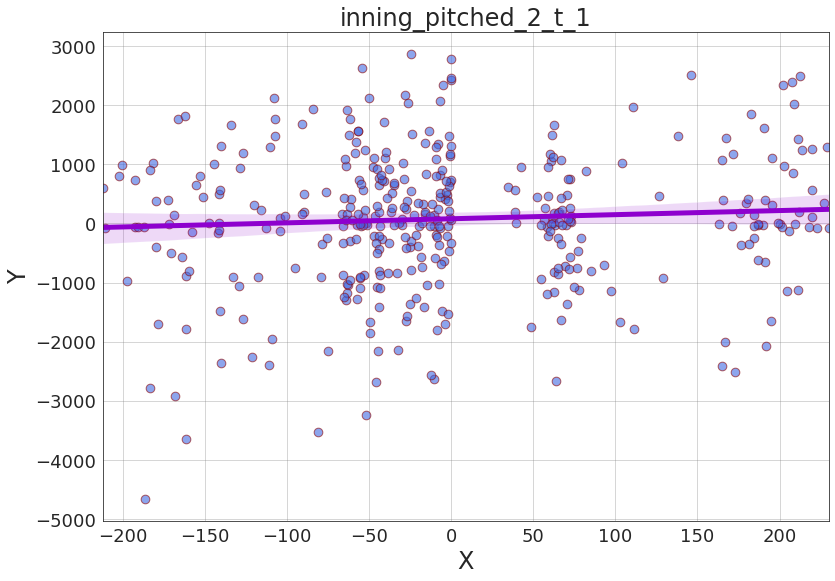

Losses_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1510
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.698
Time:                        10:50:09   Log-Likelihood:                -3222.9
No. Observations:                 381   AIC:                             6450.
Df Residuals:                     379   BIC:                             6458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0843     58.955      0

<Figure size 1080x648 with 0 Axes>

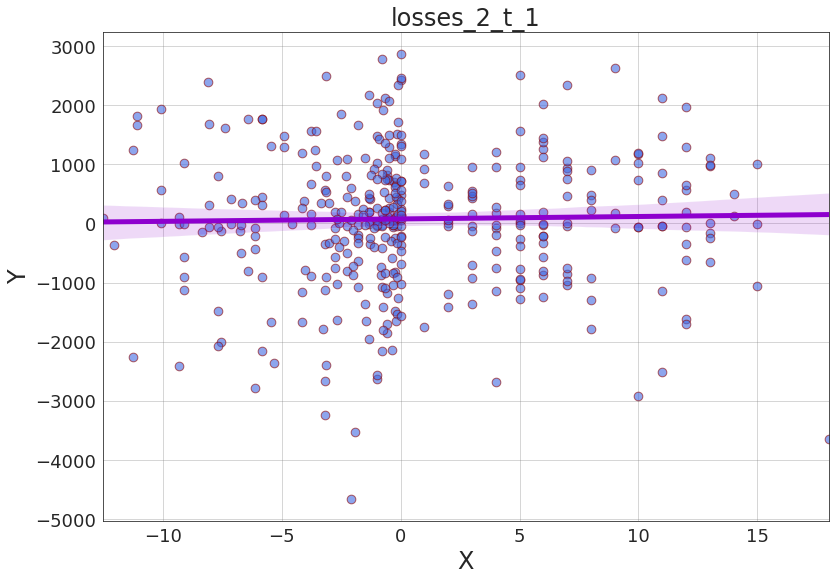

Saves_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5042
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.478
Time:                        10:50:14   Log-Likelihood:                -1766.1
No. Observations:                 211   AIC:                             3536.
Df Residuals:                     209   BIC:                             3543.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -52.9220     73.667     -0.

<Figure size 1080x648 with 0 Axes>

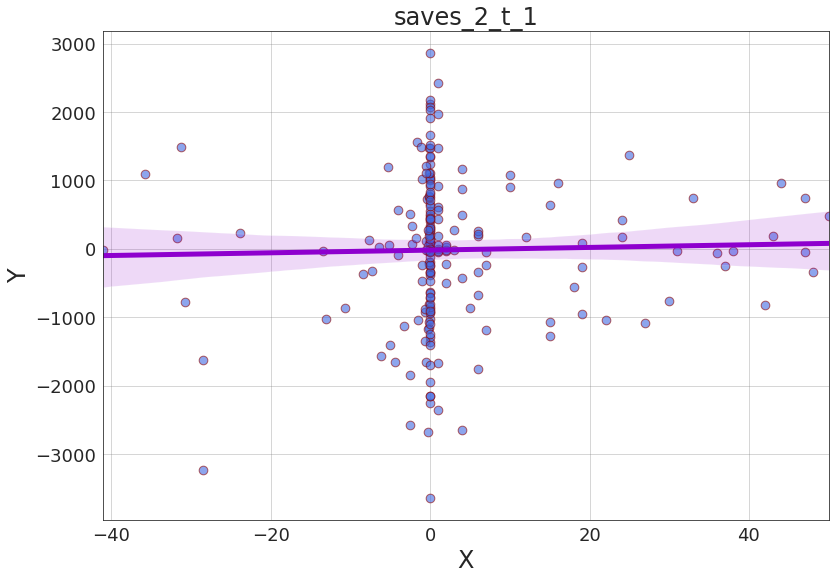

TVS_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2247
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.636
Time:                        10:50:19   Log-Likelihood:                -3044.5
No. Observations:                 360   AIC:                             6093.
Df Residuals:                     358   BIC:                             6101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.3227     62.295      0.66

<Figure size 1080x648 with 0 Axes>

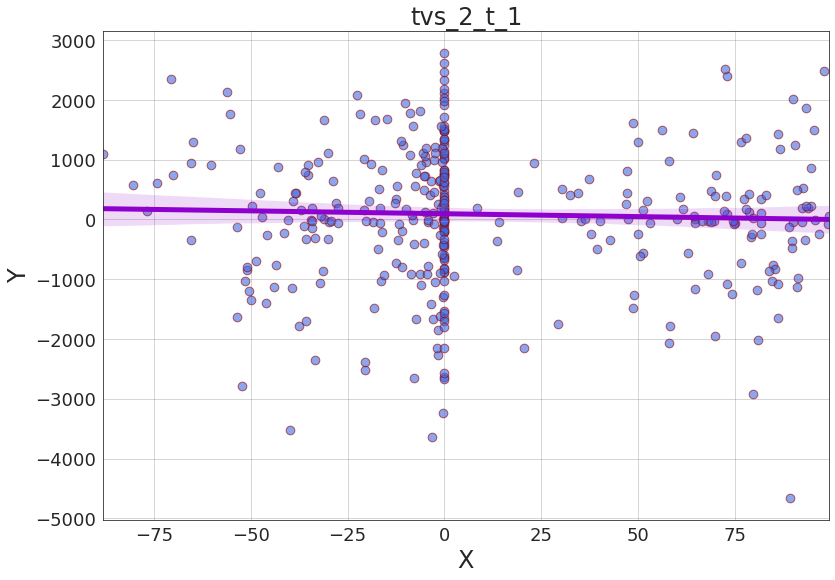

WAR_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1096
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.741
Time:                        10:50:25   Log-Likelihood:                -3222.9
No. Observations:                 381   AIC:                             6450.
Df Residuals:                     379   BIC:                             6458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.6985     59.738      0.56

<Figure size 1080x648 with 0 Axes>

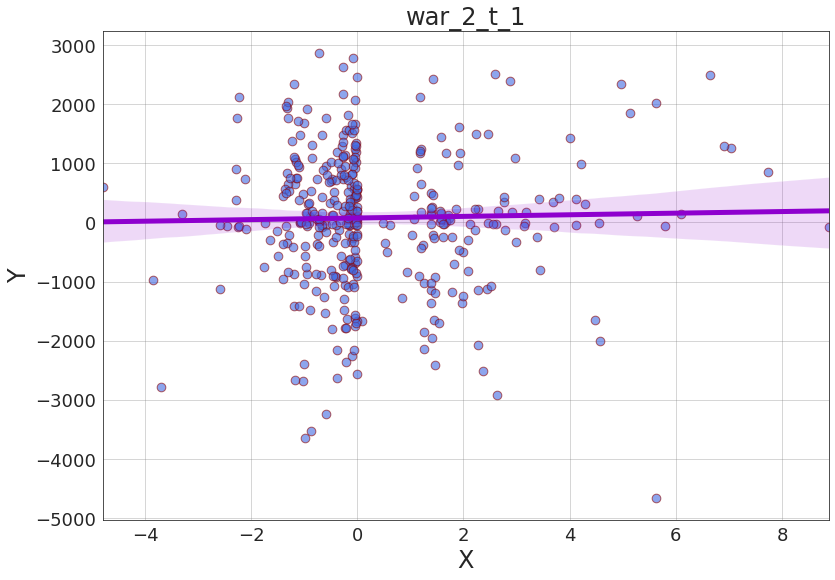

WHIP_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     10.38
Date:                Fri, 20 Jan 2023   Prob (F-statistic):            0.00139
Time:                        10:50:30   Log-Likelihood:                -3217.8
No. Observations:                 381   AIC:                             6440.
Df Residuals:                     379   BIC:                             6447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.8154     58.475      1.1

<Figure size 1080x648 with 0 Axes>

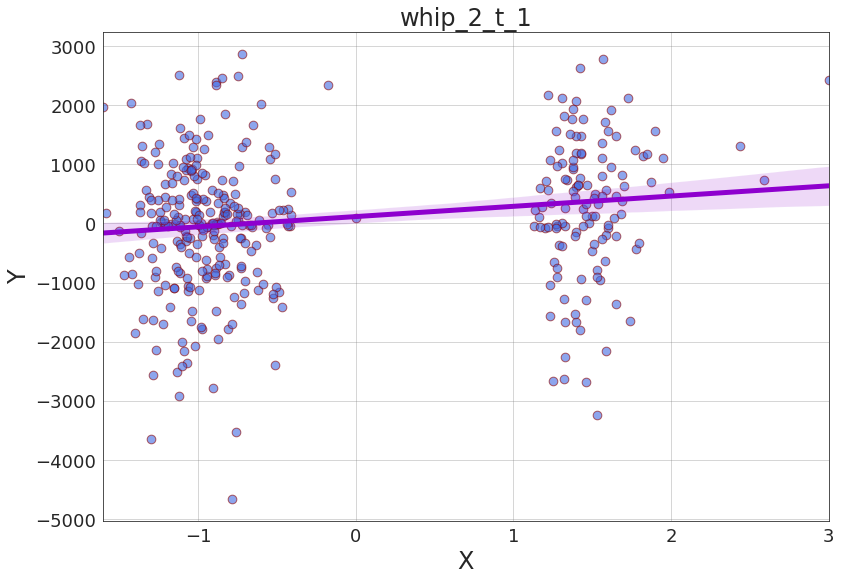

Walks_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.535
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0338
Time:                        10:50:36   Log-Likelihood:                -3220.7
No. Observations:                 381   AIC:                             6445.
Df Residuals:                     379   BIC:                             6453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.3770     58.304      0.

<Figure size 1080x648 with 0 Axes>

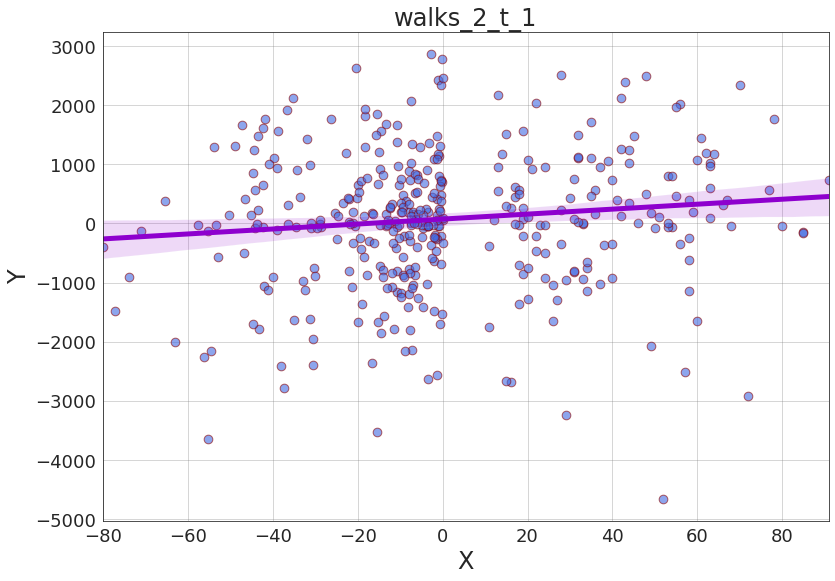

Wins_2_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.209
Date:                Fri, 20 Jan 2023   Prob (F-statistic):             0.0740
Time:                        10:50:41   Log-Likelihood:                -3203.8
No. Observations:                 379   AIC:                             6412.
Df Residuals:                     377   BIC:                             6420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1257     60.121      0.1

<Figure size 1080x648 with 0 Axes>

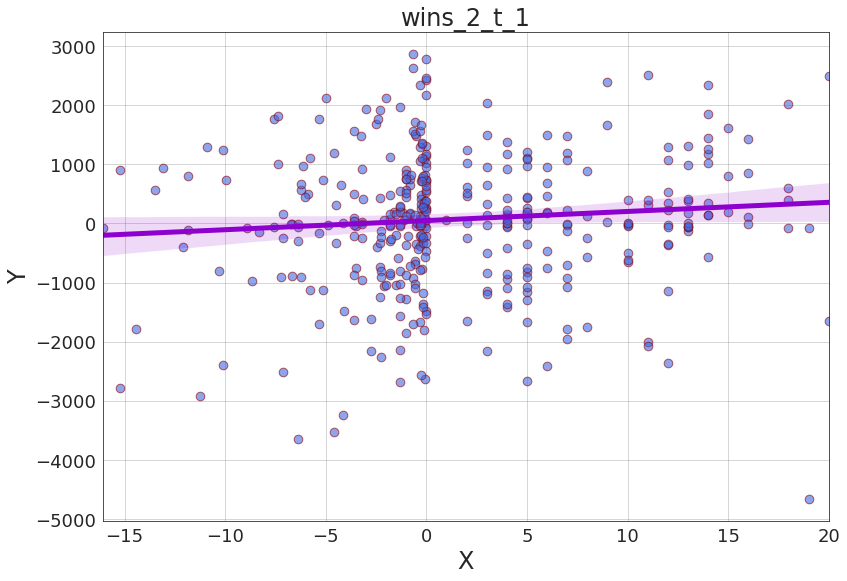

<Figure size 1080x648 with 0 Axes>

In [18]:
for statistic in range(0,pitcher_Statistics_len):
    df_pitcher_model_t[statistic], pitcher_model_t[statistic] = etl_regression(pitcher_statistics_t[statistic],
                                                                               Y_pitcher_raw_t,
                                                                               df_pitchers_copy)
    
    print(colored(pitcher_statistics_t[statistic], "cyan"))
    print(pitcher_model_t[statistic].summary())
    print('\n')
    
    sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))
    sns.regplot(data = df_pitcher_model_t[statistic],
                x = "X",
                y = "Y",
                color = 'black',
                robust = True,
                scatter_kws={"color": 'royalblue',
                             'edgecolor':'darkred',
                             "s":75, "alpha":0.6},
                line_kws={"color": "#8e00ce",
                          'lw':5,
                          'linestyle':'-'})
    plt.xlabel("X",
               size = 24)
    plt.ylabel("Y",
               size = 24)
    plt.title(str(pitcher_statistics_t[statistic]).lower(),
              size = 24)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(color = 'gray',
             linestyle = '-',
             alpha = 0.4)
    plt.show()
    plt.savefig(path + "/Visualizations/Models/Linear_models/Pitchers/" + str(pitcher_statistics_t[statistic]).lower() + ".pdf",
                format = "pdf")

## Hitters

Hagamos lo mismo para los *hitters*.

In [20]:
hitter_statistics_t = ['At_bats_t_1', 'Bateos_t_1', 'Home_runs_t_1', 'Juegos_t_1',
                       'Porcentaje_On_base_plus_slugging_t_1', 'Bateos_promedio_t_1', 'Porcentaje_juegos_t_1',
                       'Runs_batted_in_t_1', 'TVS_t_1', 'WAR_t_1', 'At_bats_2_t_1', 'Bateos_2_t_1',
                       'Home_runs_2_t_1', 'Porcentaje_On_base_plus_slugging_2_t_1',
                       'Bateos_promedio_2_t_1', 
                       'Runs_batted_in_2_t_1', 'TVS_2_t_1', 'WAR_2_t_1']
Y_hitter_raw_t = 'Sueldo_ajustado_t'
hitter_Statistics_len = len(hitter_statistics_t)
hitter_model_t = [None]*hitter_Statistics_len
df_hitter_model_t = [None]*hitter_Statistics_len

In [22]:
for statistic in range(0,hitter_Statistics_len):
    df_hitter_model_t[statistic], hitter_model_t[statistic] = etl_regression(hitter_statistics_t[statistic],
                                                                             Y_hitter_raw_t,
                                                                             df_hitters_copy)
    
    print(colored(hitter_statistics_t[statistic], "cyan"))
    print(hitter_model_t[statistic].summary())
    print('\n')
    
    """sns.set_style('white')
    fig,axes = plt.subplots(figsize = (13,9))
    sns.regplot(data = df_hitter_model_t[statistic],
                x = "X",
                y = "Y",
                color = 'black',
                robust = True,
                scatter_kws={"color": 'royalblue',
                             'edgecolor':'darkred',
                             "s":75, "alpha":0.6},
                line_kws={"color": "#8e00ce",
                          'lw':5,
                          'linestyle':'-'})
    plt.xlabel("X",
               size = 24)
    plt.ylabel("Y",
               size = 24)
    plt.title(str(hitter_statistics_t[statistic]).lower(),
              size = 24)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(color = 'gray',
             linestyle = '-',
             alpha = 0.4)
    plt.show()
    plt.savefig(path + "/Visualizations/Models/Linear_models/Hitters/" + str(hitter_statistics_t[statistic]).lower() + ".pdf",
                format = "pdf")"""

At_bats_t_1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.252
Date:                Fri, 20 Jan 2023   Prob (F-statistic):              0.134
Time:                        10:55:51   Log-Likelihood:                -3077.2
No. Observations:                 362   AIC:                             6158.
Df Residuals:                     360   BIC:                             6166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -80.2235     62.923     -1.